In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('salary.csv')

In [6]:
df

,Positions,Level,Salary
0,Jr. D,1,45000
1,Jr. C,2,50000
2,Sr. C,3,60000
3,manager,4,80000
4,country manager,5,110000
5,region manager,6,150000
6,partner,7,200000
7,sr. partner,8,300000
8,c-level,9,500000
9,CEO,10,1000000


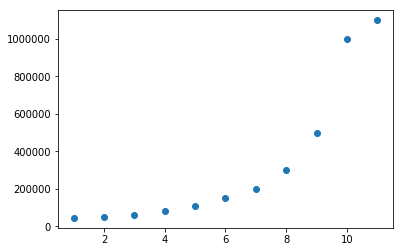

In [7]:
plt.scatter(df['Level'], df['Salary'])

In [8]:
x = df.iloc[:,1:2].values
y = df.iloc[:,2:3].values

In [9]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]], dtype=int64)

In [10]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000],
       [1100000]], dtype=int64)

In [11]:
from sklearn.linear_model import LinearRegression
lg1 = LinearRegression()
lg1.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
ypred1 = lg1.predict(x) 

In [13]:
ypred1

array([[-169772.72727273],
       [ -70454.54545455],
       [  28863.63636364],
       [ 128181.81818182],
       [ 227500.        ],
       [ 326818.18181818],
       [ 426136.36363636],
       [ 525454.54545455],
       [ 624772.72727273],
       [ 724090.90909091],
       [ 823409.09090909]])

In [16]:
from sklearn.metrics import r2_score
r2_score(y,ypred1)

0.7410470094093324

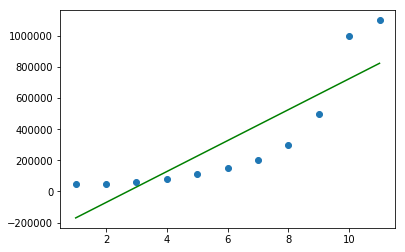

In [18]:
plt.scatter(df['Level'], df['Salary'])
plt.plot(x,ypred1, color="green")

In [ ]:
# a0 + a1x^1+ a2x^2 + a3x^3 + a4x^4 

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
xpoly = poly_reg.fit_transform(x)

In [20]:
xpoly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04],
       [1.0000e+00, 1.1000e+01, 1.2100e+02, 1.3310e+03, 1.4641e+04]])

In [21]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]], dtype=int64)

In [24]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
reg2.fit(xpoly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
ypred2 = reg2.predict(xpoly)

In [27]:
ypred2

array([[  24790.20979027],
       [  79370.62937058],
       [  82447.55244748],
       [  70827.50582745],
       [  74114.21911419],
       [ 114708.62470862],
       [ 207808.85780887],
       [ 361410.25641028],
       [ 576305.36130538],
       [ 846083.91608394],
       [1157132.86713294]])

In [28]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000],
       [1100000]], dtype=int64)

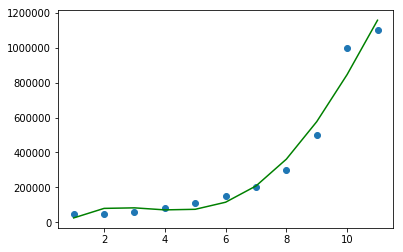

In [29]:
plt.scatter(x,y)
plt.plot(x,ypred2, color="green")

In [30]:
r2pred = r2_score(y,ypred2)

In [31]:
r2pred

0.9719976664722059